In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,4,1939,0.000138,0.1030,20.06,0,Red


## Предобработка и анализ данных

In [3]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [5]:
df.shape

(240, 6)

In [6]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

##### Много совпадений в столбце 'Star color'. Исправим

In [7]:
tempz = df['Star color'].str.lower().str.split('-')
tempz = tempz.apply(lambda x: ' '.join(x)).str.strip()
tempz[tempz == 'white yellow'] = 'yellow white'

In [8]:
df['Star color'] = tempz

In [9]:
df["Star color"].unique()

array(['red', 'blue white', 'white', 'yellowish white',
       'pale yellow orange', 'blue', 'whitish', 'yellow white', 'orange',
       'yellowish', 'orange red'], dtype=object)

Сократили количество цветов до 11

Теперь посмотрим на распределение в этом столбце

In [10]:
df['Star color'].value_counts()

Star color
red                   112
blue                   56
blue white             41
white                  10
yellow white            9
yellowish white         3
yellowish               3
whitish                 2
orange                  2
pale yellow orange      1
orange red              1
Name: count, dtype: int64

Объединим в один столбец последние 3 строки (orange, pale yellow orange, orange red)

In [11]:
df[df == 'pale yellow orange'] = 'orange'
df[df == 'orange red'] = 'orange'

In [12]:
df["Star color"].value_counts()

Star color
red                112
blue                56
blue white          41
white               10
yellow white         9
orange               4
yellowish white      3
yellowish            3
whitish              2
Name: count, dtype: int64

#### Посмотрим на распределение числовых признаков

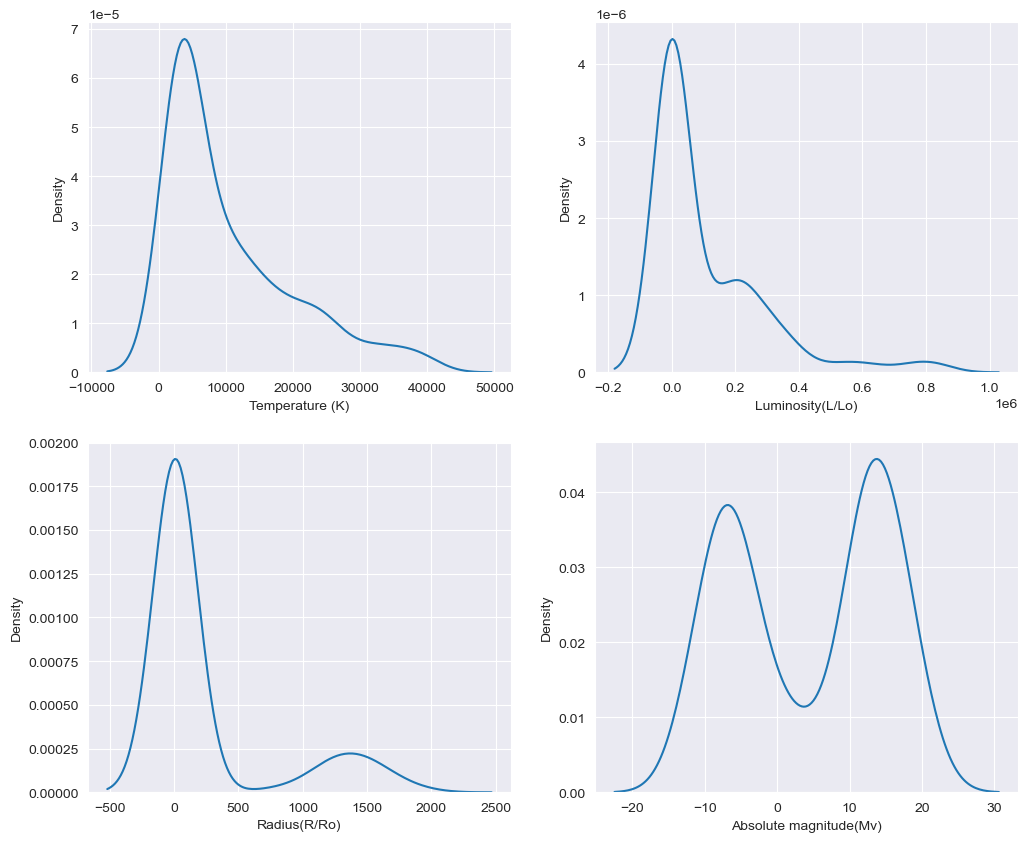

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

for i,column in enumerate(df.columns[:4]):
    sns.kdeplot(df[column], ax = ax[i//2,i%2])


1. **Температура (верхний левый график)**:
   - Большинство звезд имеют температуру в диапазоне от 0 до 10,000 К.
   - Пик плотности наблюдается около 5,000 К.
   - Небольшое количество звезд имеет температуру выше 20,000 К.

2. **Светимость (верхний правый график)**:
   - Светимость большинства звезд сосредоточена в районе от 0 до 200,000 $L_{\odot}$ (где $L_{\odot}$ — светимость Солнца).
   - Пик плотности наблюдается около 50,000 $L_{\odot}$.
   - Есть небольшое количество звезд с очень высокой светимостью до 1,000,000 $L_{\odot}$.

3. **Радиус (нижний левый график)**:
   - Большинство звезд имеют радиус в пределах от 0 до 500 $R_{\odot}$ (где $R_{\odot}$ — радиус Солнца).
   - Пик плотности находится около 200 $R_{\odot}$.
   - Есть небольшое количество звезд с радиусом вплоть до 2,500 $R_{\odot}$.

4. **Абсолютная величина (нижний правый график)**:
   - Распределение плотности абсолютной величины имеет два явных пика: один около -10 и второй около 15.
   - Это указывает на наличие двух основных популяций звезд: одна группа состоит из очень ярких звезд (отрицательные величины), а другая из более тусклых звезд (положительные величины).

#### Посмотрим на распределение категориальных признаков

In [14]:
# Отберем только 5 популярных цветов звезд (9 на графике не поместится)

temp_arr = df['Star color'].value_counts().nlargest(5)
temp_df = df[df["Star color"].apply(lambda x: x in temp_arr)]

<Axes: xlabel='Star color', ylabel='Count'>

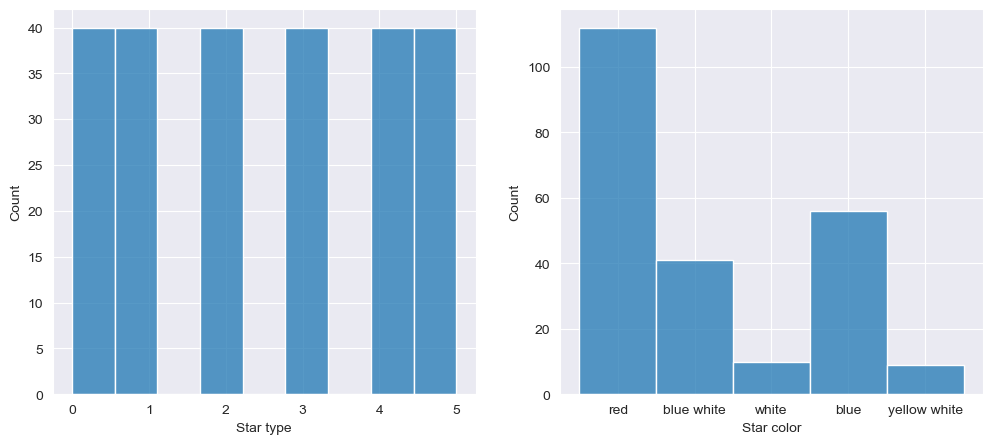

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df["Star type"], ax=ax[0])
sns.histplot(temp_df['Star color'], ax=ax[1])

#### Разделение выборки

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Temperature (K)', axis=1), df['Temperature (K)'], test_size=0.3, random_state=42)

#### Масштабирование выборки и One-Hot encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Определение колонок
numerical_cols = X_train._get_numeric_data().columns
categorical_cols = ['Star color']

# Создание трансформеров для числовых и категориальных данных
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Объединение трансформеров в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Преобразование выборок
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Масштабирование целевой переменной
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

## Построение базовой нейронной сети

In [191]:
import torch.nn as nn
import torch
import random

In [211]:
# Фиксация сидов для воспроизводимости
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)


# Преобразование в тензоры
X_train = torch.FloatTensor(X_train_processed)
X_test = torch.FloatTensor(X_test_processed)
y_train = torch.FloatTensor(y_train_scaled)
y_test = torch.FloatTensor(y_test_scaled)

In [212]:
class NN(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons, n_out_neurons):
        super().__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, n_out_neurons)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)

        return x

n_in_neuron = X_train.shape[1]
n_hidden_neuron = 64
n_out_neuron = 1

net = NN(n_in_neuron, n_hidden_neuron, n_out_neuron)
optimizer = torch.optim.Adam(net.parameters(), lr= 1e-3)
loss = nn.MSELoss()

num_epoch = 100

In [213]:
for epoch in range(num_epoch):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()
    loss_value = loss(preds, y_train)
    loss_value.backward()

    optimizer.step()

#### Прогнозирование

In [214]:
net.eval()
test_preds_scaled = net.forward(X_test).flatten().detach().numpy()

# Восстановление масштаба прогнозов
test_preds = y_scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).flatten()
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [215]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test_preds, y_test))

5480.883710632937

#### Создание графика

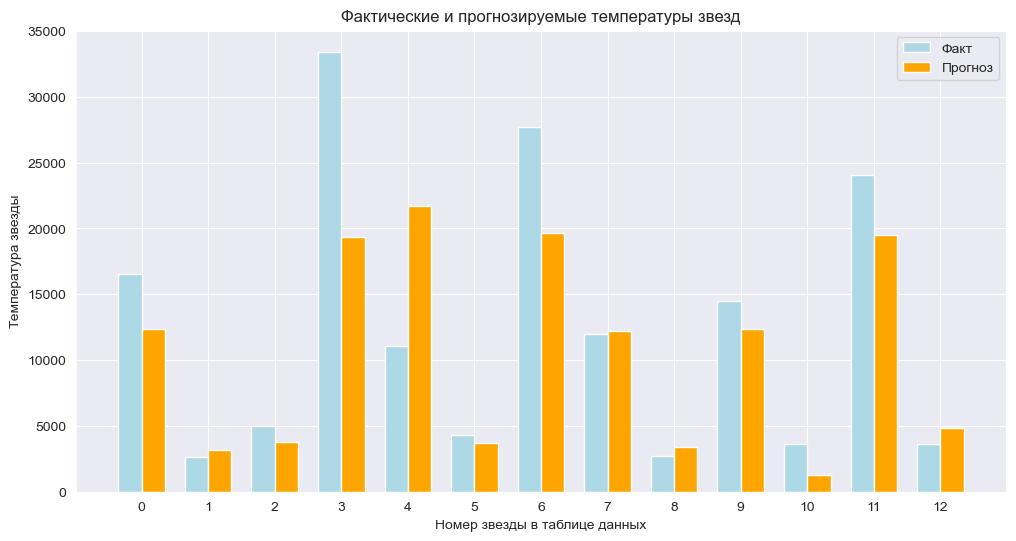

In [216]:
indices = np.arange(len(test_preds))[:13]
fact_values = y_test[:13]
pred_values = test_preds[:13]

bar_width = 0.35

fig, ax = plt.subplots(figsize = (12,6))
bars1 = ax.bar(indices, fact_values, bar_width, label='Факт', color='lightblue')
bars2 = ax.bar(indices + bar_width, pred_values, bar_width, label='Прогноз', color='orange')

ax.set_xlabel('Номер звезды в таблице данных')
ax.set_ylabel('Температура звезды')
ax.set_title('Фактические и прогнозируемые температуры звезд')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()

#### Основные выводы:

1. **Различия между фактическими и прогнозируемыми значениями:**
   - В некоторых случаях прогнозируемые температуры сильно отличаются от фактических. Например, для звезды под номером 3 фактическая температура значительно выше прогнозируемой.
   - Для звезды под номером 4  наблюдается обратная ситуация – прогнозируемая температура значительно выше фактической.

2. **Точность прогнозов:**
   - В некоторых случаях прогнозы достаточно близки к фактическим данным. Например, для звезд под номерами 5, 7 и 8 разница между фактическими и прогнозируемыми значениями незначительна.

RMSE = 5480

## Улучшение нейронной сети

In [207]:
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.tensorboard import SummaryWriter


def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

X_train = torch.FloatTensor(X_train_processed)
X_test = torch.FloatTensor(X_test_processed)
y_train = torch.FloatTensor(y_train_scaled)
y_test = torch.FloatTensor(y_test_scaled)

class NN2(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons, n_out_neurons):
        super(NN2, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons)
        self.act2 = nn.ReLU()

        self.fc3 = nn.Linear(n_hidden_neurons, n_out_neurons)


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)

        x = self.fc3(x)

        return x

# Загрузка данных
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Параметры модели
n_in_neuron = X_train.shape[1]
n_hidden_neuron = 64
n_out_neuron = 1

net2 = NN2(n_in_neuron, n_hidden_neuron, n_out_neuron)

# Использование нескольких оптимизаторов
optimizers = {
    'RMSprop': optim.RMSprop(net2.parameters(), lr=1e-3, weight_decay=1e-5),
    'Adam': optim.Adam(net2.parameters(), lr=1e-3, weight_decay=1e-5)
}
optimizer = optimizers['RMSprop']  # Выбор оптимизатора

loss_fn = nn.MSELoss()

# Warm-up для learning rate
def lr_lambda(epoch):
    if epoch < 10:
        return epoch / 10
    else:
        return 1

scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

# TensorBoard для визуализации
writer = SummaryWriter()

num_epochs = 400
best_train_loss = float('inf')

for epoch in range(num_epochs):
    net2.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        preds = net2(X_batch).flatten()
        loss_value = loss_fn(preds, y_batch)
        loss_value.backward()

        # Gradient Clipping
        torch.nn.utils.clip_grad_norm_(net2.parameters(), max_norm=1.0)

        optimizer.step()
        running_loss += loss_value.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    writer.add_scalar('Training Loss', epoch_loss, epoch)

    # Обновление learning rate через scheduler
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    # Сохранение лучшей модели
    if epoch_loss < best_train_loss:
        best_train_loss = epoch_loss
        torch.save(net2.state_dict(), 'best_model.pth')

    # Выводим текущий loss для мониторинга
    if (epoch + 1) % 40 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, LR: {current_lr}')

writer.close()
print("Обучение завершено")

Epoch 40/400, Loss: 0.17690908908843994, LR: 0.001
Epoch 80/400, Loss: 0.197854798464548, LR: 0.001
Epoch 120/400, Loss: 0.15812463348820097, LR: 0.001
Epoch 160/400, Loss: 0.14401096282970338, LR: 0.001
Epoch 200/400, Loss: 0.13179541875918707, LR: 0.001
Epoch 240/400, Loss: 0.12767348935206732, LR: 0.001
Epoch 280/400, Loss: 0.11819105134123847, LR: 0.001
Epoch 320/400, Loss: 0.10573315407548632, LR: 0.001
Epoch 360/400, Loss: 0.16409508954911006, LR: 0.001
Epoch 400/400, Loss: 0.14771346960748946, LR: 0.001
Обучение завершено


#### Прогнозирование

In [209]:
net2.eval()
test_preds_scaled = net2.forward(X_test).flatten().detach().numpy()

# Восстановление масштаба прогнозов
test_preds = y_scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).flatten()
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

np.sqrt(mean_squared_error(test_preds, y_test))

4789.184195798892

С batchnorm = 5131
batchnorm + init weights (uniform=5517 > normal=5523) = 5517

dropout = 5357
dropout + init weights (uniform=6240 > normal=6818) = 6240

Добавление методов = 4789:
- Warm-up для Learning Rate помогает плавно разогнать learning rate в начале обучения.
- Gradient Clipping ограничивает градиенты, чтобы предотвратить их взрыв.
- TensorBoard используется для мониторинга потерь и learning rate.

#### Создание графика

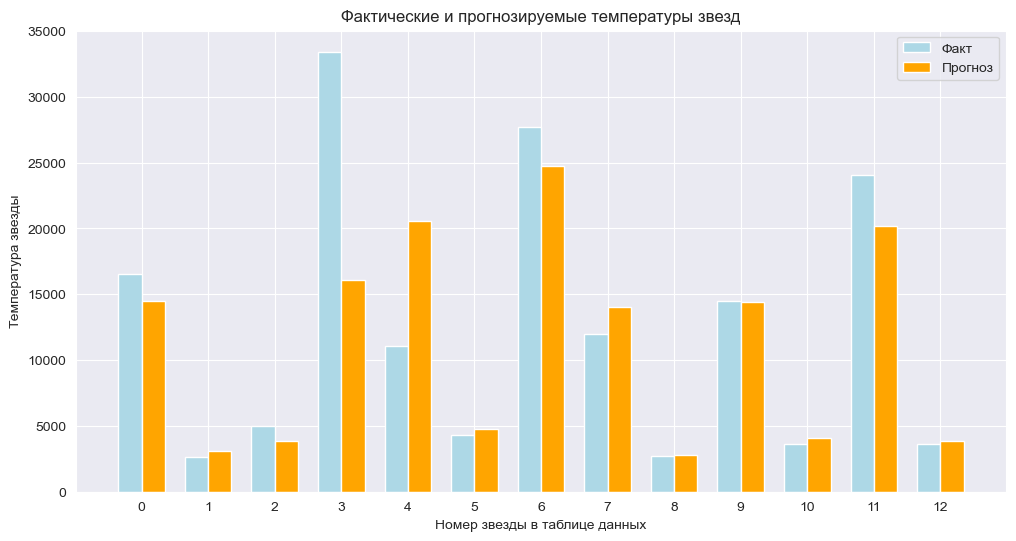

In [210]:
indices = np.arange(len(test_preds))[:13]
fact_values = y_test[:13]
pred_values = test_preds[:13]

bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(indices, fact_values, bar_width, label='Факт', color='lightblue')
bars2 = ax.bar(indices + bar_width, pred_values, bar_width, label='Прогноз', color='orange')

ax.set_xlabel('Номер звезды в таблице данных')
ax.set_ylabel('Температура звезды')
ax.set_title('Фактические и прогнозируемые температуры звезд')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(indices)
ax.legend()

plt.show()

## Выводы

После улучшения модель стала значительно точнее. В случаях, когда базовая модель делала небольшие ошибки, например, в прогнозах значений 5, 8, 10 и 12, улучшенная модель практически не ошибается. Однако в ситуациях, где ошибка была значительной, улучшенная модель показывает результаты, которые либо такие же, либо немного лучше.

Окончательное значение RMSE составляет 4789.